<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ </b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

**Автор**: Ермекова Асель

## Описание домашнего задания

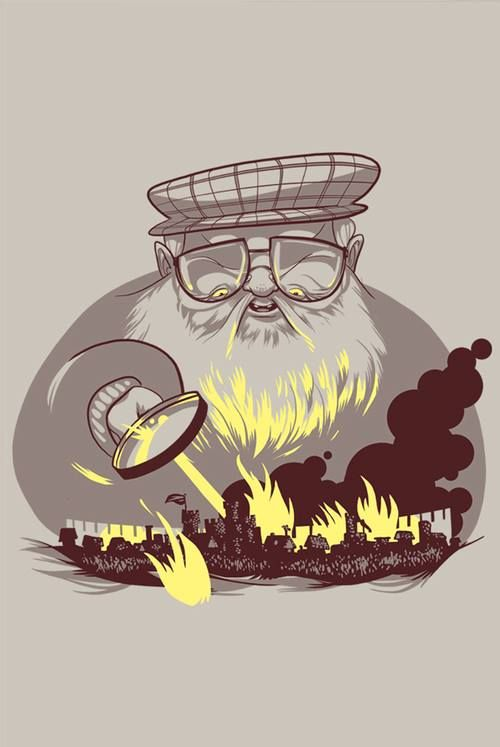

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.80$ --- 5 баллов

2) $0.80 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.50$ --- 1 балл

6) $score < 0.50$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 40.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 62.9MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas
import matplotlib
import seaborn

**Задание 1.2.** Загрузите `train` и `test` датасеты в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [76]:
df_train = pandas.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
df_test = pandas.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')

In [4]:
df_train.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

(!) Не забудьте изменить также тестовый датасет.

In [5]:
df_train.dtypes

,0
name,object
title,object
male,int64
culture,object
dateOfBirth,float64
mother,object
father,object
heir,object
house,object
spouse,object


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

Есть как вещественные переменные с NaN, так и категориальные, их нужно обрабатывать по-разному.

In [7]:
df_train.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [60]:
cat_columns = df_train.select_dtypes(include=['object'])
cat_columns

,title,culture,mother,father,heir,house,spouse
S.No,,,,,,,
1,Ser,Northmen,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,House Frey,Walder Frey
2,Lord of the Crossing,Rivermen,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Frey,Perra Royce
3,Ser,Northmen,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Swyft,Walder Frey
4,Queen,Northmen,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Arryn,Viserys I Targaryen
5,Greenstone,Dornish,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Santagar,Eldon Estermont
...,...,...,...,...,...,...,...
1553,Archmaester,Northmen,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Frey,Walder Frey
1554,Ser,Northmen,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Frey,Walder Frey
1555,Ser,Northmen,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Seaworth,Walder Frey


In [9]:
cat_columns = [col for col in df_train.columns if df_train[col].dtype == 'object']
cat_columns

['name', 'title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse']

Мода выводит упорядоченный список наиболее встречаемых значений

In [10]:
df_train['mother'].mode()

,mother
0,Cersei Lannister
1,Rhaenyra Targaryen


In [11]:
for col in cat_columns:
  df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

In [12]:
num_columns = df_train.columns[~df_train.columns.isin(cat_columns)]
num_columns

Index(['male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')

In [13]:
for col in num_columns:
  df_train[col] = df_train[col].fillna(df_train[col].median())

In [14]:
df_train.isna().sum()

,0
name,0
title,0
male,0
culture,0
dateOfBirth,0
mother,0
father,0
heir,0
house,0
spouse,0


In [15]:
num_columns = num_columns.drop('isAlive')
num_columns

Index(['male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity'],
      dtype='object')

In [16]:
for col in cat_columns:
  df_test[col] = df_test[col].fillna(df_train[col].mode()[0])
for col in num_columns:
  df_test[col] = df_test[col].fillna(df_train[col].median())

**Задание 1.4.** Создайте новые признаки.
* **1 шаг.** Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* **2 шаг.** Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* **3 шаг.** Упростите признак culture, объединив схожие названия в один.

(!) Не забудьте изменить также тестовый датасет.

1 шаг.

Apply не изменяет колонку, над которой происходит действие

In [17]:
df_train['isPopular'] = df_train['popularity'].apply(lambda x: 0 if x < 0.5 else 1)
df_train['isPopular']

,isPopular
S.No,
1,1
2,1
3,0
4,0
5,0
...,...
1553,0
1554,0
1555,0


In [24]:
df_test['isPopular'] = df_test['popularity'].apply(lambda x: 0 if x < 0.5 else 1)

2 шаг.

In [18]:
df_train['boolDeadRelations'] = df_train['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
df_train['boolDeadRelations']

,boolDeadRelations
S.No,
1,1
2,1
3,0
4,0
5,0
...,...
1553,0
1554,0
1555,0


In [25]:
df_test['boolDeadRelations'] = df_test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

3 шаг.

In [19]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [20]:
list(cult.keys()).index('Summer Islands')

0

In [21]:
list(cult.values())[0]

['summer islands', 'summer islander', 'summer isles']

In [22]:
def rename_culture(culture):
  for key in cult.keys():
    if culture in cult[key]:
      return key
  return culture

In [23]:
df_train['culture'] = df_train['culture'].apply(rename_culture)
df_train['culture']

,culture
S.No,
1,Northmen
2,Rivermen
3,Northmen
4,Northmen
5,Dornish
...,...
1553,Northmen
1554,Northmen
1555,Northmen


In [26]:
df_test['culture'] = df_test['culture'].apply(rename_culture)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

(!) Не забудьте изменить также тестовый датасет.

In [ ]:
df_train.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,House Frey,Walder Frey,...,0.0,1.0,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Frey,Perra Royce,...,1.0,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,Northmen,272.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Swyft,Walder Frey,...,1.0,1.0,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,Northmen,82.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Arryn,Viserys I Targaryen,...,1.0,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Santagar,Eldon Estermont,...,1.0,1.0,1,1,29.0,0,0.043478,1,0,0


In [75]:
df_train.drop(['name'], axis=1, inplace=True)

In [30]:
df_test.drop(['name'], axis=1, inplace=True)

In [ ]:
# data.drop(columns=[...], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
df_train['isAlive']

,isAlive
S.No,
1,0
2,1
3,1
4,0
5,1
...,...
1553,1
1554,0
1555,0


In [ ]:
df_train['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


Датасет не сбалансирован по классам.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

  (!) Не забудьте изменить также тестовый датасет.

In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

In [36]:
cat_columns = ['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse'] # without 'name'

In [37]:
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_train[cat_columns])

one_hot_df = pandas.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_columns), index=df_train.index)

In [38]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_train_encoded = pandas.concat([df_train, one_hot_df], axis=1)

# Drop the original categorical columns
df_train_encoded = df_train_encoded.drop(cat_columns, axis=1)

# Display the resulting dataframe
df_train_encoded

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,...,spouse_Viserys I Targaryen,spouse_Walder Frey,spouse_Walter Whent,spouse_Walton Frey,spouse_Whalen Frey,spouse_Wylis Manderly,spouse_Wynafrei Whent,spouse_Yandry,spouse_Ynys Yronwood,spouse_Zhoe Blanetree
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,208.0,1,1,1,1,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,272.0,0,0,0,1,0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,82.0,0,0,0,0,0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,276.0,0,0,0,1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,272.0,1,0,1,1,0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0,272.0,1,1,0,0,0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,1,272.0,0,1,1,1,1,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_test[cat_columns])

one_hot_df = pandas.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_columns), index=df_test.index)

# Concatenate the one-hot encoded dataframe with the original dataframe
df_test_encoded = pandas.concat([df_test, one_hot_df], axis=1)

# Drop the original categorical columns
df_test_encoded = df_test_encoded.drop(cat_columns, axis=1)

# Display the resulting dataframe
df_test_encoded

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,...,spouse_Stannis Baratheon,spouse_Sybelle Glover,spouse_Taena of Myr,spouse_Theomar Smallwood,spouse_Tyrion Lannister,spouse_Tysha,spouse_Walder Frey,spouse_Willam Dustin,spouse_Ysilla,spouse_Ysilla Royce
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,156.0,0,0,0,0,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1559,0,272.0,0,1,1,1,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1560,0,272.0,0,0,1,1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1561,1,272.0,1,1,1,1,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1562,1,262.0,1,1,1,1,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,272.0,1,1,1,1,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1943,1,272.0,0,1,0,1,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1944,1,272.0,1,1,1,1,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [40]:
import matplotlib.pyplot as plt

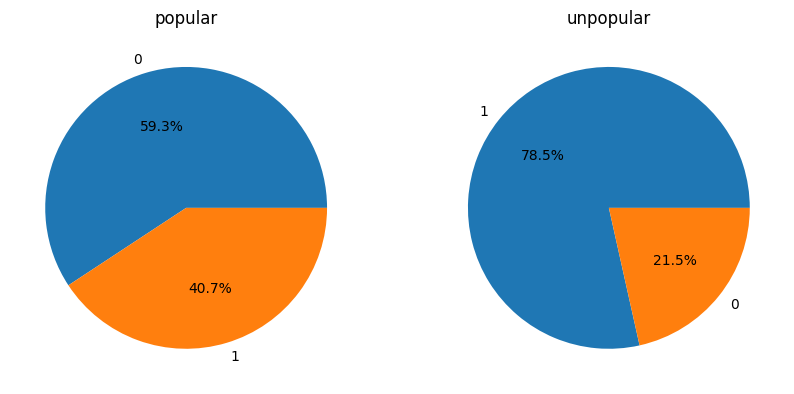

In [47]:
data1 = df_train[df_train['isPopular'] == 1]['isAlive'].value_counts()
data2 = df_train[df_train['isPopular'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax1.set_title('popular')
ax2.set_title('unpopular')

plt.show()

In [49]:
df_train.head()

,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Ser,1,Northmen,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,House Frey,Walder Frey,0,...,0.0,1.0,0,0,24.0,11,0.605351,0,1,1
2,Lord of the Crossing,1,Rivermen,208.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Frey,Perra Royce,1,...,1.0,1.0,1,1,97.0,1,0.896321,1,1,1
3,Ser,1,Northmen,272.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Swyft,Walder Frey,0,...,1.0,1.0,0,1,24.0,0,0.267559,1,0,0
4,Queen,0,Northmen,82.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Arryn,Viserys I Targaryen,0,...,1.0,0.0,1,1,23.0,0,0.183946,0,0,0
5,Greenstone,0,Dornish,276.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Santagar,Eldon Estermont,0,...,1.0,1.0,1,1,29.0,0,0.043478,1,0,0


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [61]:
X = df_train_encoded.drop(['isAlive'], axis=1, inplace=False)
y = df_train_encoded['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`.

(!) Здесь мы разделяем данные на основе файла `game_of_thrones_train.csv` на две части: train часть, на которой мы будем обучать наши модели и test часть на которой мы будем валидировать наши модели. У нас также есть тестовые данные из файла `game_of_thrones_test.csv`, для которых мы должны будем сделать предсказания при помощи лучшей модели.

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [56]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [57]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [78]:
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_scaled = scaler.transform(X_train)

In [93]:
# correlation_matrix = X_train.corr()

# plt.figure(figsize=(8, 6))
# seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Feature Correlation Heatmap")
# plt.show()

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [89]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=10, max_iter=10000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_log = logistic_regression.predict(X_test)

In [65]:
X_train.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,...,spouse_Viserys I Targaryen,spouse_Walder Frey,spouse_Walter Whent,spouse_Walton Frey,spouse_Whalen Frey,spouse_Wylis Manderly,spouse_Wynafrei Whent,spouse_Yandry,spouse_Ynys Yronwood,spouse_Zhoe Blanetree
S.No,,,,,,,,,,,,,,,,,,,,,
811,0,272.0,0,0,0,1,0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
649,1,272.0,0,0,0,0,0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1521,1,241.0,0,1,1,1,1,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0,272.0,0,1,0,0,0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,1,272.0,0,0,0,0,1,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [91]:
# Шаг 1. создание модели
models = [AdaBoostClassifier(), RandomForestClassifier(), GaussianProcessClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]
preds = []
# Шаг 2. обучение модели
for model in models:
  model.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
  preds.append(model.predict(X_test))

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [83]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [84]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7532


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [92]:
# Шаг 3. Предсказание на тестовых данных
for p in preds:
  accuracy = accuracy_score(y_test, p)
  print("Accuracy : %.4f" % accuracy)
# Шаг 4. Оценка предсказания по метрике accuracy


Accuracy : 0.8109
Accuracy : 0.7853
Accuracy : 0.8269
Accuracy : 0.4712
Accuracy : 0.8045
Accuracy : 0.7917
Accuracy : 0.7917


Выберите лучшую модель.

AdaBoostClassifier

### Файл `submission.csv`

Вам нужно:
* **1 шаг.** сделать предсказания для `game_of_thrones_test.csv` при помощи лучшей модели
* **2 шаг.** подставить в `submission.csv` файле в колонке `isAlive` свои предсказания
* **3 шаг.** сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


1 шаг.

In [ ]:
X_real_test = df_test.values
y_real_test_pred = models['AdaBoost'].predict(X_real_test)

2 шаг.

In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [ ]:
submission['isAlive'] = y_real_test_pred

3 шаг. сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)